Audio length: 15.0s at 48000 Hz


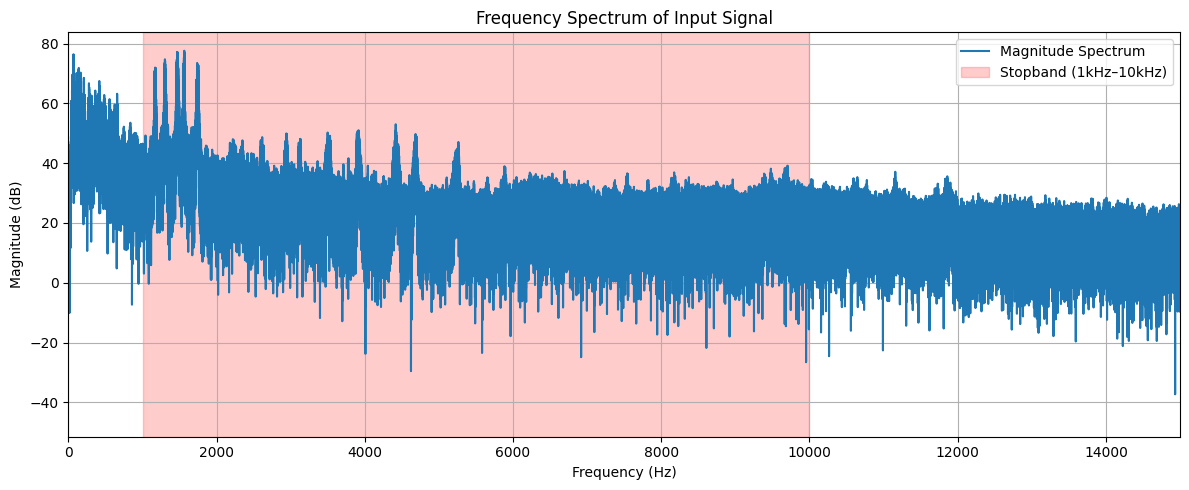

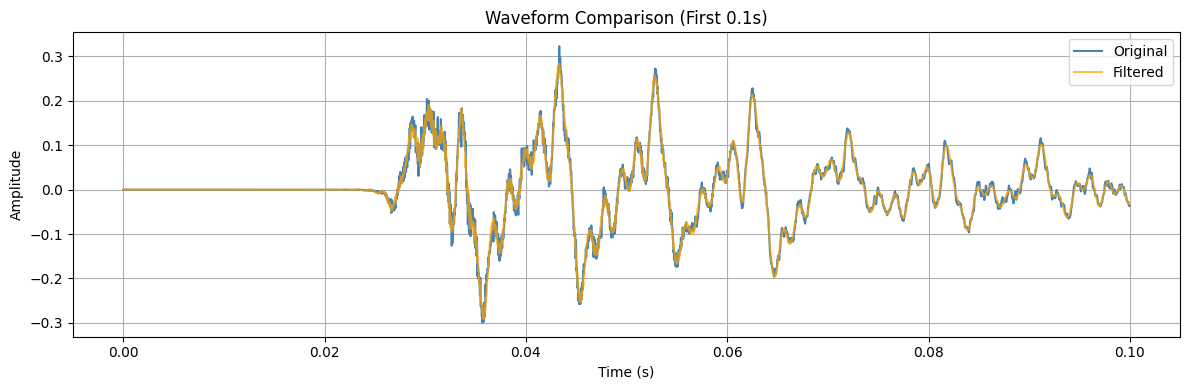

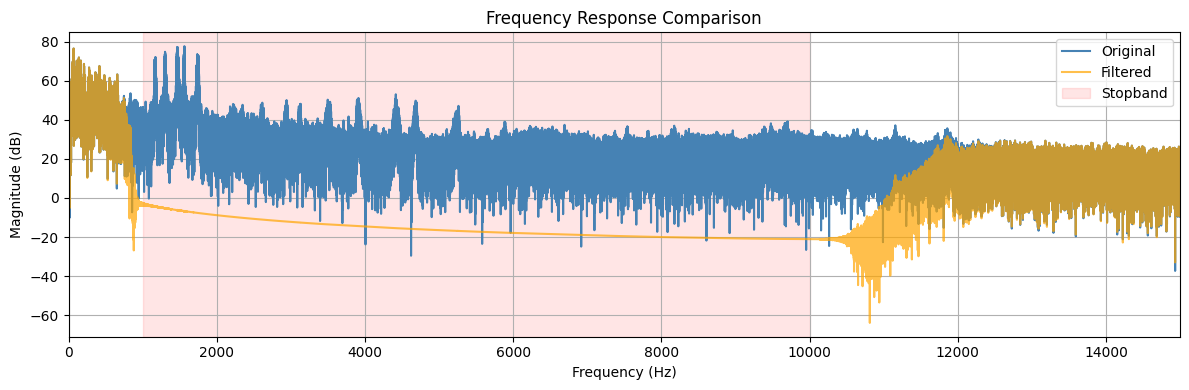

✅ Filtered audio saved as 'clean_output.wav'


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import soundfile as sf

# --- Load and normalize audio ---
def load_audio(file_path):
    sample_rate, signal_data = wavfile.read(file_path)
    if len(signal_data.shape) > 1:
        signal_data = np.mean(signal_data, axis=1)  # Convert stereo to mono
    normalized = signal_data.astype(np.float32) / np.max(np.abs(signal_data))
    return sample_rate, normalized

# --- Plot frequency spectrum and save ---
def plot_freq_spectrum(signal_data, sample_rate):
    n = len(signal_data)
    fft_result = np.fft.rfft(signal_data)
    freqs = np.fft.rfftfreq(n, d=1/sample_rate)
    magnitude_db = 20 * np.log10(np.abs(fft_result) + 1e-10)

    plt.figure(figsize=(12, 5))
    plt.plot(freqs, magnitude_db, label='Magnitude Spectrum')
    plt.axvspan(1000, 10000, color='red', alpha=0.2, label='Stopband (1kHz–10kHz)')
    plt.title('Frequency Spectrum of Input Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.xlim(0, 15000)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig("input_frequency_spectrum.png", dpi=300)
    plt.show()

# --- Design Chebyshev Band-Stop Filter ---
def create_filter(sample_rate, low=1000, high=10000):
    nyquist = sample_rate / 2
    low_cut = max(0.001, min(0.999, low / nyquist))
    high_cut = max(0.001, min(0.999, high / nyquist))
    b, a = signal.cheby2(10, 60, [low_cut, high_cut], btype='bandstop')
    return b, a

# --- Apply filter to audio ---
def filter_audio(signal_data, sample_rate):
    b, a = create_filter(sample_rate)
    return signal.filtfilt(b, a, signal_data)

# --- Compare original vs. filtered and save plots ---
def compare_audio(original, filtered, sample_rate):
    t = np.arange(len(original)) / sample_rate

    # Time-domain waveform plot
    plt.figure(figsize=(12, 4))
    plt.plot(t[:sample_rate // 10], original[:sample_rate // 10], label='Original', color='steelblue')
    plt.plot(t[:sample_rate // 10], filtered[:sample_rate // 10], alpha=0.7, label='Filtered', color='orange')
    plt.title("Waveform Comparison (First 0.1s)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig("waveform_comparison.png", dpi=300)
    plt.show()

    # Frequency-domain FFT comparison
    fft_orig = np.fft.rfft(original)
    fft_filt = np.fft.rfft(filtered)
    freqs = np.fft.rfftfreq(len(original), d=1/sample_rate)

    plt.figure(figsize=(12, 4))
    plt.plot(freqs, 20 * np.log10(np.abs(fft_orig) + 1e-10), label='Original', color='steelblue')
    plt.plot(freqs, 20 * np.log10(np.abs(fft_filt) + 1e-10), alpha=0.7, label='Filtered', color='orange')
    plt.axvspan(1000, 10000, color='red', alpha=0.1, label='Stopband')
    plt.title("Frequency Response Comparison")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.xlim(0, 15000)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig("fft_response_comparison.png", dpi=300)
    plt.show()

# --- Main execution ---
if __name__ == "__main__":
    # Step 1: Load input audio file
    sample_rate, audio_data = load_audio("song_with_2piccolo.wav")
    print(f"Audio length: {len(audio_data) / sample_rate:.1f}s at {sample_rate} Hz")

    # Step 2: Visualize frequency content
    plot_freq_spectrum(audio_data, sample_rate)

    # Step 3: Filter unwanted frequency band
    filtered_audio = filter_audio(audio_data, sample_rate)

    # Step 4: Compare before and after filtering
    compare_audio(audio_data, filtered_audio, sample_rate)

    # Step 5: Save cleaned audio
    sf.write("clean_output.wav", filtered_audio, sample_rate)
    print("✅ Filtered audio saved as 'clean_output.wav'")

